<a href="https://colab.research.google.com/github/KaveeshwaraBandara/Datathon_initial_round/blob/main/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/combined/combinedFinalUpdated5.csv')    # reading the csv file
train.head()      # printing first five rows of the file

,filename,orig_filename,isIllegalParking,isTrash,isVandalized,isRoadBroken,isDamagedSign
0,img_000001.jpg,IMG_8957_jpg.rf.456f721731266a2aeada9b8c629529...,0,0,0,0,1
1,img_000002.jpg,IMG_8118_jpg.rf.4580c1b49d5632ae09a94f9c243ccb...,0,0,0,0,0
2,img_000003.jpg,IMG_8758_jpg.rf.4582839332a8ad38628bca59f41ba1...,0,0,0,0,1
3,img_000004.jpg,IMG_8978_jpg.rf.45ce64630c62523d2ab9ba6fa3e658...,0,0,0,0,1
4,img_000005.jpg,IMG_8950_jpg.rf.45d53560b3dc56d8831d6cb32f4acc...,0,0,0,0,1


In [ ]:
train.columns

Index(['filename', 'orig_filename', 'isIllegalParking', 'isTrash',
       'isVandalized', 'isRoadBroken', 'isDamagedSign'],
      dtype='object')

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    filename = f"/content/drive/MyDrive/Colab Notebooks/Dataset/combined/images/{train['filename'][i]}"  # Corrected path
    img = image.load_img(filename, target_size=(224, 224, 3))
    img = image.img_to_array(img)
    img = img / 255.0
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 2061/2061 [22:57<00:00,  1.50it/s]


In [ ]:
X.shape

(2061, 224, 224, 3)

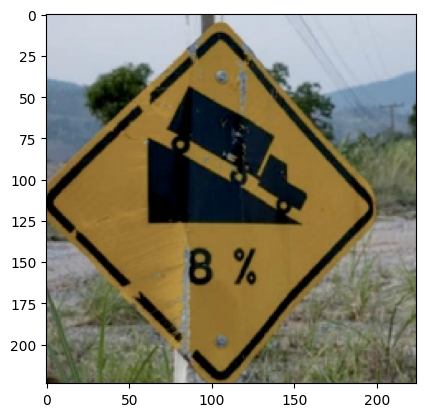

In [ ]:
plt.imshow(X[2])

In [ ]:
train['isDamagedSign'][1]

np.int64(0)

In [ ]:
y = np.array(train.drop(['filename', 'orig_filename'],axis=1))

In [ ]:
#y = y[:1000]

In [ ]:
y.shape

(2061, 5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 5 labels
model.add(Dense(5, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 49, 49, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 995,685 (3.80 MB)

 Trainable params: 995,685 (3.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)'''

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)
datagen.fit(X_train)

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 555ms/step - accuracy: 0.1881 - loss: 0.6038 - val_accuracy: 0.1159 - val_loss: 0.5468
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.2013 - loss: 0.5038 - val_accuracy: 0.1159 - val_loss: 0.5141
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.2234 - loss: 0.4901 - val_accuracy: 0.2802 - val_loss: 0.4919
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.3119 - loss: 0.4643 - val_accuracy: 0.4396 - val_loss: 0.4336
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3687 - loss: 0.4317 - val_accuracy: 0.4251 - val_loss: 0.4013
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.3514 - loss: 0.4223 - val_accuracy: 0.4638 - val_loss: 0.3849
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3976 - loss: 0.4102 - val_accuracy: 0.5024 - val_loss: 0.3760
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.4453 - loss: 0.3772 - val_accuracy: 0.4251 

In [ ]:
img = image.load_img('/content/drive/MyDrive/test2.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 907ms/step
isTrash (0.766)
isRoadBroken (0.0415)
isVandalized (0.00148)


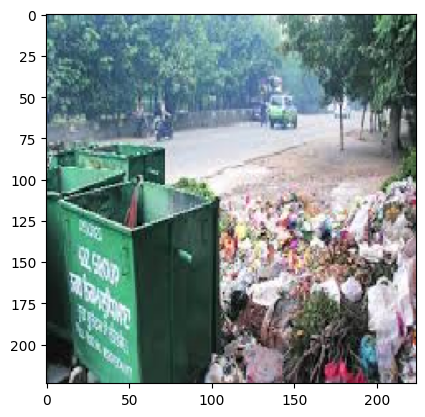

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

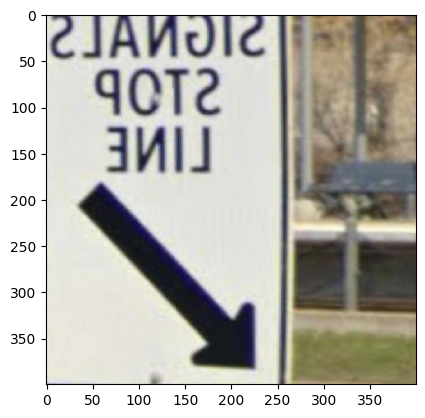

In [ ]:
plt.imshow(X[1])

In [ ]:
y[1]

array([0, 1, 0, 0, 0])

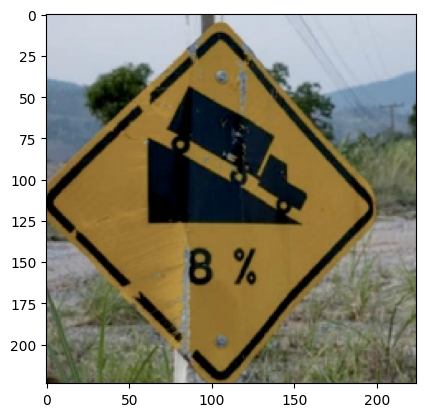

In [ ]:
plt.imshow(X[2])

In [ ]:
y[2]

array([0, 0, 0, 0, 0])

In [ ]:
train.tail()

,filename,orig_filename,isIllegalParking,isNotDamagedSign,isTrash,isVandalized,isRoadBroken
1082,img_001083.jpg,78_jpg.rf.9c8099c466fdad4d7b8abe0aa00753c6.jpg,0,0,0,0,1
1083,img_001084.jpg,photographed-closeup-road-marking-located-260n...,0,0,0,0,0
1084,img_001085.jpg,36_jpg.rf.6edf24d96a2f978ba21e5bac417bc167.jpg,0,0,0,0,1
1085,img_001086.jpg,images-3_jpg.rf.892b0cdb4596c12fe3bc3c387d6ecf...,0,0,0,0,0
1086,img_001087.jpg,343_jpg.rf.b8381333a8616e50f00c9cc55e0ba661.jpg,0,0,0,0,1


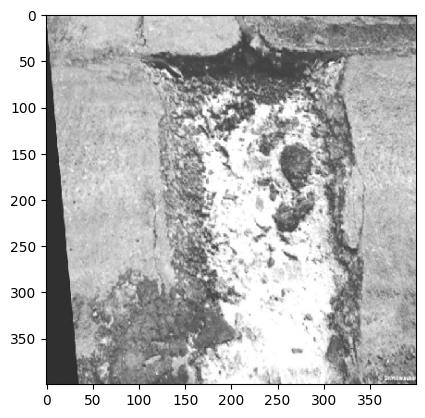

In [ ]:
plt.imshow(X[1086])

In [ ]:
y[1086]

array([0, 0, 0, 0, 1])

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/testmulti.jpg',target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
isDamagedSign (0.866)
isVandalized (0.383)
isIllegalParking (0.000787)


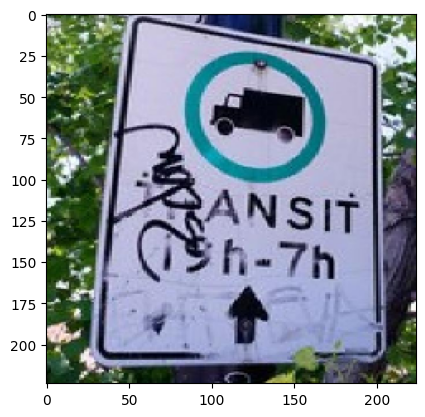

In [ ]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)